## Part1 - Step1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
import timeit
import random
random.seed(551)

In [ ]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(np.array(-z, dtype=np.float128)))       #logistic function
def gradient(x, y, w):
    N,D = x.shape
    yh = logistic(np.dot(x, w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

def gradient_descent(x, y, w, epsilon, learning_rate, max_iters):
    N,D = x.shape
    grad = np.inf
    t = 1
    cost_t = []
    cost_v = []
    # np.linalg.norm(grad) > epsilon or
    while t <= max_iters:
        grad = gradient(x, y, w)               # compute the gradient with present weight
        w = w - learning_rate * grad         # weight update step
        t += 1
        cost_t.append(cost_fn(x, y, w))
        Nt = validation_features.shape[0]
        cost_v.append(cost_fn(np.column_stack([validation_features,np.ones(Nt)]), validation_labels, w))
    return w, grad, t, cost_t, cost_v

In [ ]:
class LogisticRegression:
    
    def __init__(self, gd_func, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False, batch_size=None, decay_rate=None):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.gd_func = gd_func
        self.batch_size = batch_size
        self.decay_rate = decay_rate
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        w0 = np.zeros(D)
        if self.decay_rate != None:
            self.w, g, t, cost_t, cost_v = self.gd_func(x=x, y=y, w=w0, epsilon=self.epsilon, learning_rate=self.learning_rate, max_iters=self.max_iters, batch_size=self.batch_size, decay_rate=self.decay_rate)
        elif self.batch_size != None:
            # self.w, g, t, train, val = self.gd_func(x=x, y=y, w=w0, epsilon=self.epsilon, learning_rate=self.learning_rate, max_iters=self.max_iters, batch_size=self.batch_size)
            self.w, g, t, cost_t, cost_v = self.gd_func(x=x, y=y, w=w0, epsilon=self.epsilon, learning_rate=self.learning_rate, max_iters=self.max_iters, batch_size=self.batch_size)
        else:
            self.w, g, t, cost_t, cost_v = self.gd_func(x=x, y=y, w=w0, epsilon=self.epsilon, learning_rate=self.learning_rate, max_iters=self.max_iters)
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        # return np.linalg.norm(g), train, val
        return np.linalg.norm(g), cost_t, cost_v
        # return np.linalg.norm(g)
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

In [65]:
d_train = pd.read_csv("diabetes_train.csv")

train_features = normalize(d_train.drop(['Outcome'],axis=1), norm='l2')
train_labels = d_train['Outcome']

d_test = pd.read_csv("diabetes_test.csv")
test_features = normalize(d_test.drop(['Outcome'],axis=1), norm='l2')
test_labels = d_test['Outcome']

d_val = pd.read_csv("diabetes_val.csv")
validation_features = normalize(d_val.drop(['Outcome'],axis=1), norm='l2')
validation_labels = d_val['Outcome']

terminated after 50001 iterations, with norm of the gradient equal to 0.0010154304301160549
the weight found: [ 5.52716933 -1.25960565 -4.70098049 -0.50784771 -1.37227112 -1.39952275
  0.18291072 -1.41829177  3.03653513]


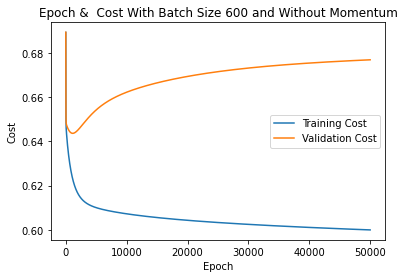

0.20661427585616584765
0.23927514166143217897
Min of Validation Cost 0.6436122017483038446
Got min on iteration 1130


In [67]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(max_iters=50000, learning_rate=0.1, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(50000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Batch Size 600 and Without Momentum")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 4.9066958501400775e-05
the weight found: [22.10621974 -1.50140646 -4.86606587 -0.39473208 -1.6454166  -1.98750934
  4.79188045 -4.61914851  3.6640315 ]


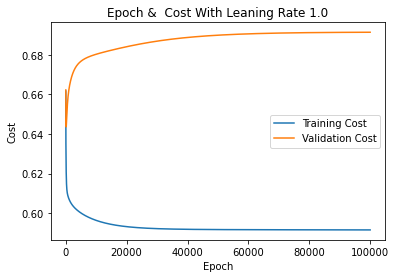

0.20242658528489590012
0.24034448948635957132
Min of Validation Cost 0.643614759733087302
Got min on iteration 112


In [26]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=1, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 1.0")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 0.011280628584730818
the weight found: [ 1.15408692e-01  2.07547929e-01 -1.47301378e+00 -3.84802810e-01
  7.89509339e-02 -2.72593418e-01  5.82470989e-04 -1.53769331e-01
 -6.47055250e-02]


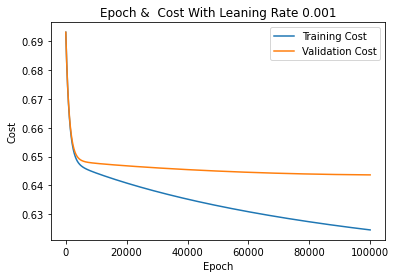

0.21712024701365365475
0.22632984646769009362
Min of Validation Cost 0.6436629511546227173
Got min on iteration 99999


In [36]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.001, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.001")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 0.002005136872330511
the weight found: [ 1.27185776  0.13393513 -3.96230418 -0.76128279 -0.48095602 -0.63819154
  0.02985208 -0.20863257  1.24549238]


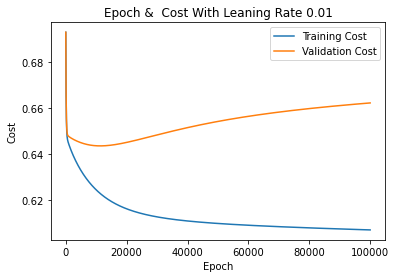

0.20944832803049624187
0.23416792886646700562
Min of Validation Cost 0.64361194253256157733
Got min on iteration 11313


In [37]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.01, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.01")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 0.0007322167206654847
the weight found: [ 9.65966677 -1.48342254 -4.77139579 -0.43889416 -1.56153121 -1.77282951
  0.39488184 -2.36506907  3.42684904]


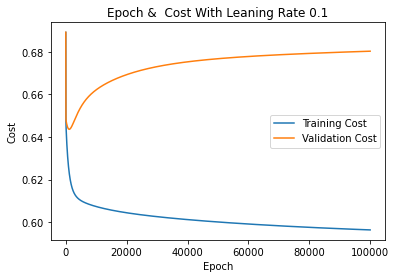

0.20498573366765300498
0.23982380831027292988
Min of Validation Cost 0.6436122017483038446
Got min on iteration 1130


In [38]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.1, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.1")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 0.0004100296512714323
the weight found: [15.09180287 -1.51409236 -4.80252992 -0.41022625 -1.61306932 -1.90481823
  0.85240243 -3.3572254   3.55966756]


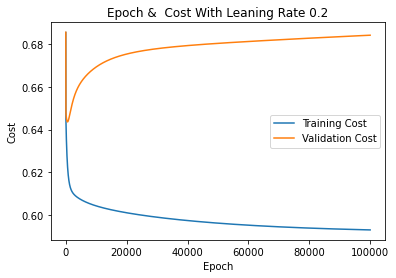

0.20347338903036498485
0.23992643007688494862
Min of Validation Cost 0.64361248897433858844
Got min on iteration 565


In [39]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.2, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.2")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 0.00023479188909308416
the weight found: [18.1414     -1.50865605 -4.82519132 -0.40111181 -1.62624196 -1.93652601
  1.33291775 -3.89986305  3.60430789]


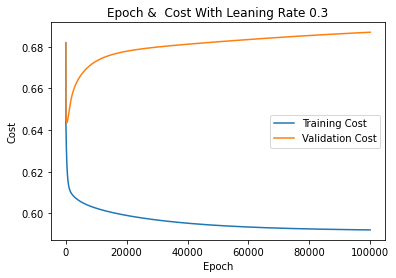

0.20291217656153598986
0.24006233435699687265
Min of Validation Cost 0.6436127744443782689
Got min on iteration 376


In [40]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.3, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.3")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 0.00013965494482205814
the weight found: [19.86749621 -1.50457999 -4.84110046 -0.39609299 -1.63376653 -1.95375673
  1.82451303 -4.20919972  3.62959507]


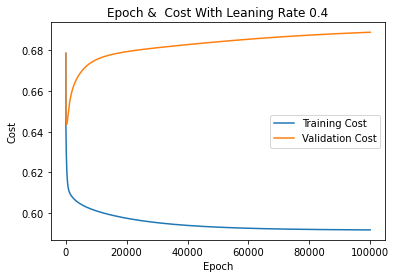

0.20268091769602644768
0.240180114812000747
Min of Validation Cost 0.64361305994655237613
Got min on iteration 282


In [41]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.4, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.4")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 8.976755402895814e-05
the weight found: [20.85166974 -1.50227874 -4.85123231 -0.39356988 -1.63830736 -1.96446985
  2.32085206 -4.38686763  3.644323  ]


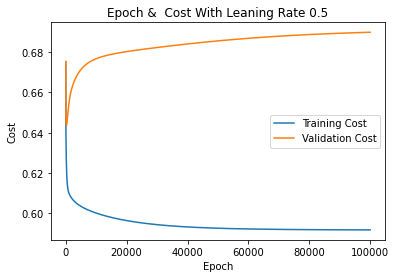

0.20257321743436155779
0.24025805149455680205
Min of Validation Cost 0.6436133492781707991
Got min on iteration 225


In [32]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.5, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.5")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 6.574329065391815e-05
the weight found: [21.41603592 -1.50114704 -4.85745342 -0.39259077 -1.64108627 -1.97164813
  2.81840293 -4.48957016  3.65292268]


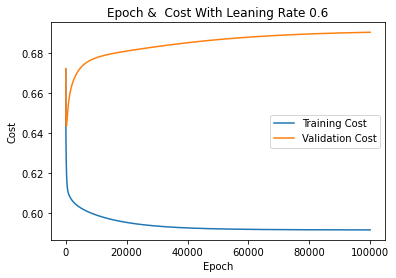

0.20251616310120800271
0.2403040135210324989
Min of Validation Cost 0.643613645199087141
Got min on iteration 188


In [31]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.6, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.6")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 5.548423838470641e-05
the weight found: [21.74138404 -1.50073221 -4.86124621 -0.39252913 -1.6428371  -1.97685904
  3.31517892 -4.5494312   3.65798281]


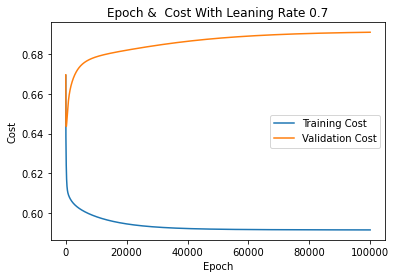

0.20248182904512784645
0.24032884378430608396
Min of Validation Cost 0.643613927816437567
Got min on iteration 161


In [30]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.7, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.7")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 5.145611221645063e-05
the weight found: [21.93012753 -1.50074348 -4.86358669 -0.39300121 -1.64399251 -1.9809578
  3.81005867 -4.58475166  3.66100504]


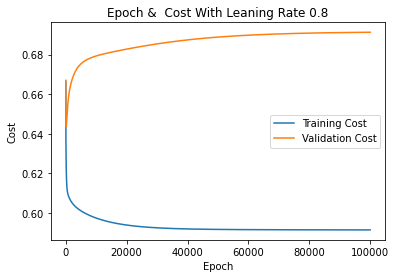

0.20245854343198100123
0.24034068893269535691
Min of Validation Cost 0.64361422590555735575
Got min on iteration 140


In [29]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.8, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.8")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 100001 iterations, with norm of the gradient equal to 4.9836409480199004e-05
the weight found: [22.04061845 -1.50100341 -4.86507434 -0.39377972 -1.64480395 -1.984419
  4.30241024 -4.60599315  3.66285523]


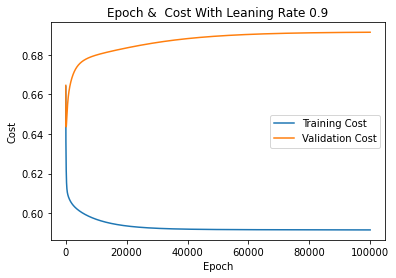

0.20244099568597285203
0.24034482901860811507
Min of Validation Cost 0.64361449078183010476
Got min on iteration 125


In [28]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(learning_rate=0.9, verbose=True, gd_func=gradient_descent)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(100000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Leaning Rate 0.9")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

## Part1 Step2

In [68]:
logistic = lambda z: 1./ (1 + np.exp(np.array(-z, dtype=np.float128)))       #logistic function
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J
def gradient(x, y, w):
    N,D = x.shape
    yh = logistic(np.dot(x, w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D
def stochastic_gradient_descent(x, y, w, epsilon, learning_rate, max_iters, batch_size):
    x, y = np.array(x), np.array(y)
    n_obs = x.shape[0]
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]
    rng = np.random.default_rng(seed=551)
    grad = np.inf
    t = 1
    max_iters = int(max_iters)
    learning_rate = np.array(learning_rate)
    cost_t = []
    cost_v = []
    for i in range(max_iters):
        t = i + 1
        rng.shuffle(xy)
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]
            y_batch  = y_batch.flatten()
            grad = gradient(x_batch, y_batch, w)
            # To ensure the sgd can converge
            diff = - learning_rate * grad
            w += diff
            # if np.all(np.abs(diff) <= 1e-06):
                # break
        # if np.linalg.norm(grad) < epsilon:
            # break
        cost_t.append(cost_fn(x, y, w))
        Nt = validation_features.shape[0]
        cost_v.append(cost_fn(np.column_stack([validation_features,np.ones(Nt)]), validation_labels, w))
    return w, grad, t, cost_t, cost_v

In [69]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(max_iters=50000, learning_rate=0.1, verbose=True, gd_func=stochastic_gradient_descent, batch_size=15)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)

terminated after 50000 iterations, with norm of the gradient equal to 0.41222968379704505
the weight found: [22.25012529 -1.53032071 -4.88490964 -0.41045074 -1.65885432 -2.01917459
  9.51936642 -4.66461461  3.63925666]


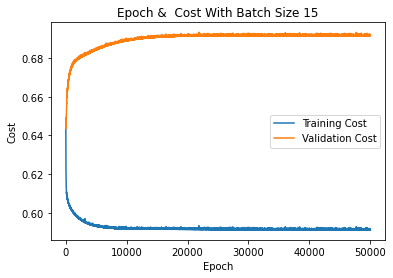

0.20272352938897550761
0.24051996144414811457
Min of Validation Cost 0.6435624720205583
Got min on iteration 26


In [70]:
x = np.arange(50000)
# print(cost_t)
# print(cost_v)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Batch Size 15")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 50000 iterations, with norm of the gradient equal to 0.17772218221146163
the weight found: [22.11100028 -1.50935276 -4.87083243 -0.39602762 -1.64869163 -1.98917898
  4.79447401 -4.62210795  3.6542846 ]


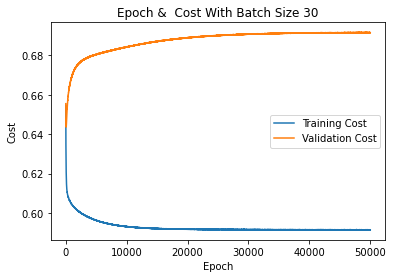

0.20253093437476355034
0.24039365687011034575
Min of Validation Cost 0.6435909218352306
Got min on iteration 56


In [71]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(max_iters=50000, learning_rate=0.1, verbose=True, gd_func=stochastic_gradient_descent, batch_size=30)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(50000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Batch Size 30")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 50000 iterations, with norm of the gradient equal to 0.0989977113365586
the weight found: [20.85405582 -1.50496241 -4.85292162 -0.39388049 -1.6395627  -1.96519147
  2.32154009 -4.3879903   3.64098557]


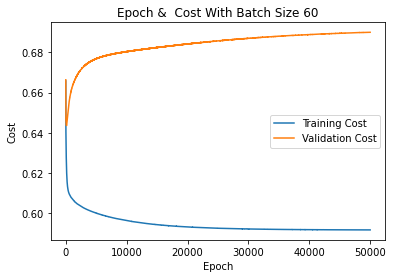

0.2026067013862149152
0.24027270519561887508
Min of Validation Cost 0.6435939581334551
Got min on iteration 113


In [72]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(max_iters=50000, learning_rate=0.1, verbose=True, gd_func=stochastic_gradient_descent, batch_size=60)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(50000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Batch Size 60")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 50000 iterations, with norm of the gradient equal to 0.07159806599520274
the weight found: [16.83486392 -1.51222485 -4.81521404 -0.40501004 -1.62118297 -1.92385481
  1.09087728 -3.66718856  3.58422087]


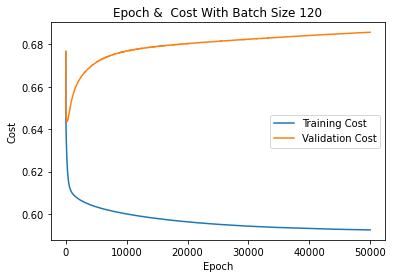

0.2031398730359842239
0.23999785232336761237
Min of Validation Cost 0.6436004260510246
Got min on iteration 225


In [73]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(max_iters=50000, learning_rate=0.1, verbose=True, gd_func=stochastic_gradient_descent, batch_size=120)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(50000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Batch Size 120")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 50000 iterations, with norm of the gradient equal to 0.039776671029206186
the weight found: [ 9.65992941 -1.48342789 -4.77141871 -0.43888328 -1.56154729 -1.77284901
  0.39489662 -2.36512286  3.42682437]


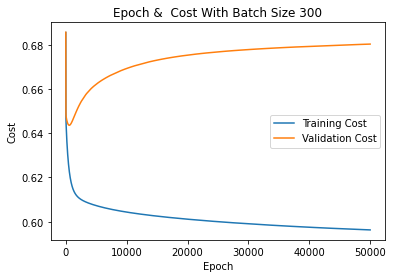

0.20498591978178593868
0.23982392619636896686
Min of Validation Cost 0.643611154318218
Got min on iteration 561


In [74]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(max_iters=50000, learning_rate=0.1, verbose=True, gd_func=stochastic_gradient_descent, batch_size=300)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(50000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Batch Size 300")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

terminated after 50000 iterations, with norm of the gradient equal to 0.0010154304301160536
the weight found: [ 5.52716933 -1.25960565 -4.70098049 -0.50784771 -1.37227112 -1.39952275
  0.18291072 -1.41829177  3.03653513]


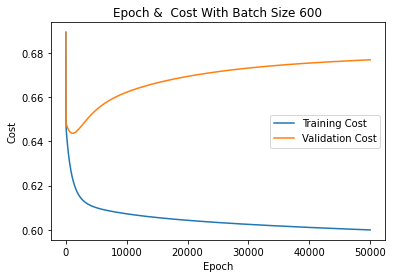

0.20661427585616583402
0.23927514166143215997
Min of Validation Cost 0.6436122017483039
Got min on iteration 1130


In [75]:
training_error = []
validation_error = []
gs = []
time = []
size = [1, 2, 4, 8,15,30,60,120,300, 600]
model = LogisticRegression(max_iters=50000, learning_rate=0.1, verbose=True, gd_func=stochastic_gradient_descent, batch_size=600)
start = timeit.default_timer()
result, cost_t, cost_v = model.fit(train_features, train_labels)
stop = timeit.default_timer()
time.append(stop - start)
gs.append(result) 
train_prediction = model.predict(train_features)
validation_prediction = model.predict(validation_features)
mse_train = mean_squared_error(train_labels, train_prediction)
mse_validation = mean_squared_error(validation_labels, validation_prediction)
training_error.append(mse_train)
validation_error.append(mse_validation)
x = np.arange(50000)
plt.plot(x, cost_t, label='Training Cost')
plt.plot(x, cost_v, label="Validation Cost")
# plt.plot(x, gs, label='Gradient')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Epoch &  Cost With Batch Size 600")
plt.legend()
plt.show()
print(mse_train)
print(mse_validation)
minimum = min(cost_v)
print("Min of Validation Cost " + str(minimum))
print("Got min on iteration " + str(cost_v.index(minimum)))

## Part1 Step3

In [108]:
logistic = lambda z: 1./ (1 + np.exp(np.array(-z, dtype=np.longdouble)))       #logistic function
def gradient(x, y, w):
    N,D = x.shape
    yh = logistic(np.dot(x, w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

def predict(x, w):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        x = np.column_stack([x,np.ones(Nt)])
        
        yh = logistic(np.dot(x, w))            #predict output
        return [1 if y > 0.5 else 0 for y in yh]

def momentum_SGD(x, y, w, epsilon, learning_rate, max_iters, batch_size, decay_rate):
    n_obs = x.shape[0]
    x, y = np.array(x), np.array(y)
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]
    rng = np.random.default_rng(seed=551)
    grad = np.inf
    t = 1
    decay_rate = np.array(decay_rate)
    max_iters = int(max_iters)
    learning_rate = np.array(learning_rate)
    diff = 0
    
    #train_accuracy = []
    #validation_accuracy = []
    cost_t = []
    cost_v = []
    for i in range(max_iters):
        t = i + 1
        rng.shuffle(xy)
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]
            y_batch  = y_batch.flatten()
            grad = gradient(x_batch, y_batch, w)
            # To ensure the sgd can converge
            diff = decay_rate * diff + (1 - decay_rate) * grad
            if np.all(np.abs(diff) <= 1e-06):
                break
            w += (-learning_rate * diff)
        
        cost_t.append(cost_fn(x, y, w))
        Nt = validation_features.shape[0]
        cost_v.append(cost_fn(np.column_stack([validation_features,np.ones(Nt)]), validation_labels, w))
        """
        train_prediction = predict(train_features, w)
        validation_prediction = predict(validation_features, w)
        accuracy_train = accuracy_score(train_labels, train_prediction)
        accuracy_validation = accuracy_score(validation_labels, validation_prediction)
        train_accuracy.append(accuracy_train)
        validation_accuracy.append(accuracy_validation)
        """
    return w, grad, t, cost_t, cost_v    
    #return w, grad, t, train_accuracy, validation_accuracy


In [174]:
def momentum_result(iters, batch_size, momentum):
    model = LogisticRegression(max_iters = iters,learning_rate=0.001, verbose=True, gd_func=momentum_SGD, batch_size=batch_size,decay_rate=momentum)
    g, train, val = model.fit(train_features, train_labels)
    x = np.arange(iters)
    plt.plot(x, train, label='Training Cost')
    plt.plot(x, val, label='Validation Cost')
    # plt.plot(x, gs, label='Gradient')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    title = "Epoch & Cost with batch size = "+str(batch_size)+ ", momentum="+ str(momentum)
    plt.title(title)
    plt.legend()
    plt.show()
    np_val = np.asarray(val,dtype = np.longdouble)
    min_index = np.argmin(np_val)
    print('min cost at epoch', min_index,'min_cost = ',min(val))

terminated after 50000 iterations, with norm of the gradient equal to 0.0010154320893617445
the weight found: [ 5.52710199 -1.25961761 -4.70098705 -0.50784671 -1.37227836 -1.39952621
  0.18290619 -1.41828558  3.03654923]


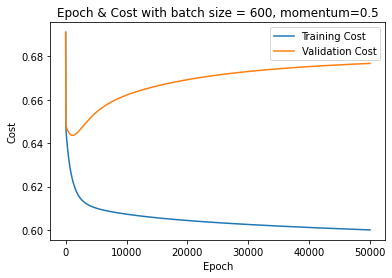

min cost at epoch 1131 min_cost =  0.6436127787050939


In [161]:
momentum_result(50000,600,0.5)

terminated after 50000 iterations, with norm of the gradient equal to 0.0010154337987052899
the weight found: [ 5.52703261 -1.25962994 -4.7009938  -0.50784567 -1.37228583 -1.39952978
  0.18290152 -1.41827921  3.03656377]


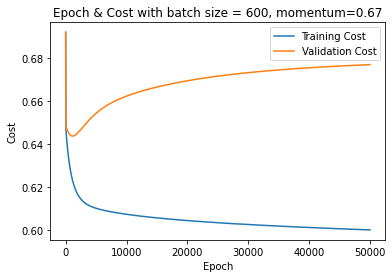

min cost at epoch 1132 min_cost =  0.6436133742638589


In [162]:
momentum_result(50000,600,0.67)

terminated after 50000 iterations, with norm of the gradient equal to 0.0010154354073505206
the weight found: [ 5.5269673  -1.25964155 -4.70100016 -0.50784469 -1.37229285 -1.39953314
  0.18289713 -1.41827322  3.03657745]


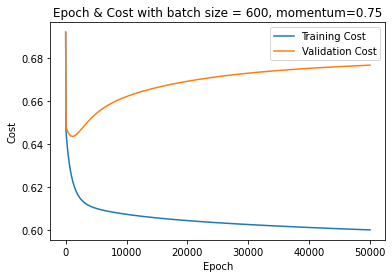

min cost at epoch 1133 min_cost =  0.6436139355745469


In [16]:
momentum_result(50000,600,0.75)

terminated after 50000 iterations, with norm of the gradient equal to 0.0010154370661342746
the weight found: [ 5.52689995 -1.25965352 -4.70100672 -0.50784369 -1.3723001  -1.39953661
  0.1828926  -1.41826704  3.03659156]


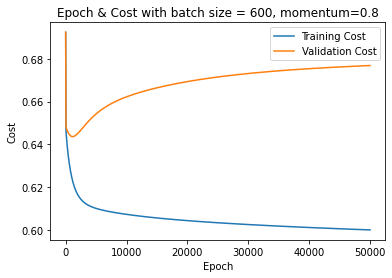

min cost at epoch 1135 min_cost =  0.6436145154103908


In [17]:
momentum_result(50000,600,0.8)

terminated after 50000 iterations, with norm of the gradient equal to 0.00101544535864173
the weight found: [ 5.52656314 -1.25971339 -4.70103951 -0.50783865 -1.37233636 -1.39955396
  0.18286996 -1.41823617  3.03666216]


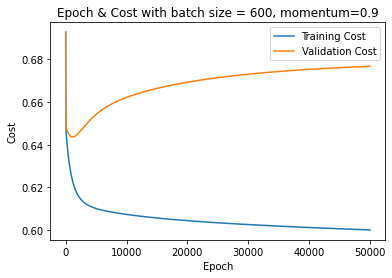

min cost at epoch 1140 min_cost =  0.6436174274252187


In [165]:
momentum_result(50000,600,0.9)

terminated after 50000 iterations, with norm of the gradient equal to 0.0010155950303442217
the weight found: [ 5.52048905 -1.26079519 -4.70163139 -0.50774866 -1.37299168 -1.39986706
  0.18246262 -1.41768368  3.03793833]


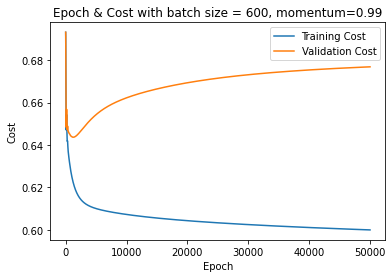

min cost at epoch 1239 min_cost =  0.6436784340959173


In [166]:
momentum_result(50000,600,0.99)

terminated after 50000 iterations, with norm of the gradient equal to 0.001017174722693779
the weight found: [ 5.45851686 -1.27187534 -4.70765166 -0.50694759 -1.37971411 -1.40290183
  0.17841442 -1.41236082  3.05103646]


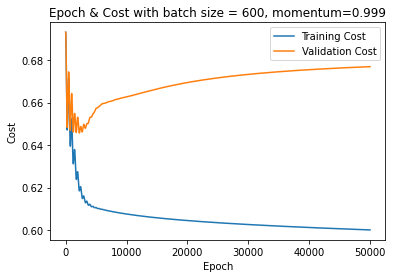

min cost at epoch 2245 min_cost =  0.6457258152856956


In [167]:
momentum_result(50000,600,0.999)

## Part1 Step4

terminated after 50000 iterations, with norm of the gradient equal to 0.4106749652978855
the weight found: [22.25007696 -1.51910306 -4.88063919 -0.40927429 -1.65803842 -2.01649719
  9.51935448 -4.6615981   3.65230434]


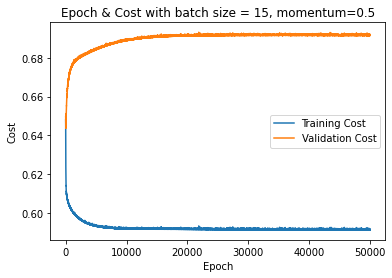

min cost at epoch 26 min_cost =  0.6436020424468185


In [147]:
momentum_result(50000,15,0.5)

terminated after 50000 iterations, with norm of the gradient equal to 0.4116704218451026
the weight found: [22.24979764 -1.51410672 -4.87835023 -0.40898361 -1.65753138 -2.01539165
  9.51929048 -4.66042012  3.65800305]


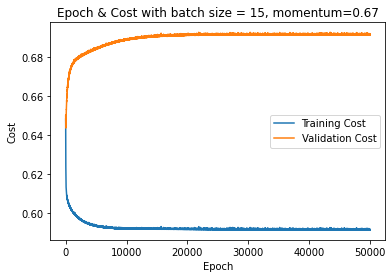

min cost at epoch 25 min_cost =  0.6436243260644048


In [148]:
momentum_result(50000,15,0.67)

terminated after 50000 iterations, with norm of the gradient equal to 0.41320780846407384
the weight found: [22.24951708 -1.51038262 -4.87631183 -0.40868361 -1.65676756 -2.01445844
  9.51914157 -4.65947962  3.66253791]


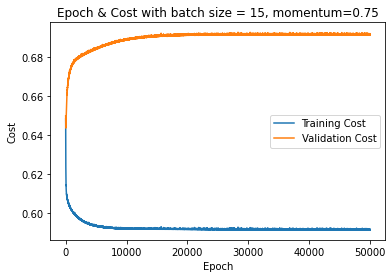

min cost at epoch 28 min_cost =  0.6435636115811734


In [149]:
momentum_result(50000,15,0.75)

terminated after 50000 iterations, with norm of the gradient equal to 0.414946603292316
the weight found: [22.24922095 -1.50695343 -4.87425557 -0.40832637 -1.65587816 -2.01352767
  9.51892259 -4.6584842   3.66687599]


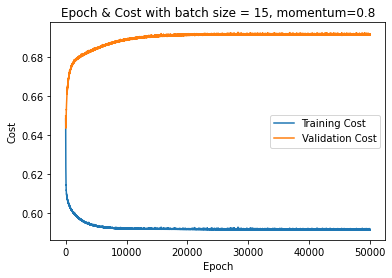

min cost at epoch 28 min_cost =  0.6435195723585347


In [150]:
momentum_result(50000,15,0.8)

terminated after 50000 iterations, with norm of the gradient equal to 0.42120524519238617
the weight found: [22.24762258 -1.49597763 -4.86664803 -0.40680325 -1.65193749 -2.01029706
  9.51761569 -4.65431022  3.68156912]


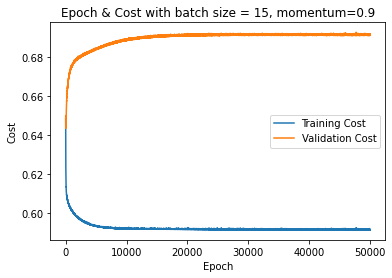

min cost at epoch 28 min_cost =  0.6434774976102209


In [151]:
momentum_result(50000,15,0.9)

terminated after 50000 iterations, with norm of the gradient equal to 0.41598680683362477
the weight found: [22.23933931 -1.50073616 -4.86675002 -0.40618839 -1.65073304 -2.01202979
  9.51200704 -4.65374817  3.67478131]


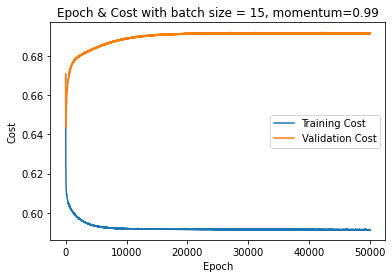

min cost at epoch 29 min_cost =  0.6436202333039165


In [152]:
momentum_result(50000,15,0.99)

terminated after 50000 iterations, with norm of the gradient equal to 0.4139416478391613
the weight found: [22.23757791 -1.5051236  -4.86888241 -0.40579656 -1.64768477 -2.01307817
  9.50714699 -4.65500447  3.67074494]


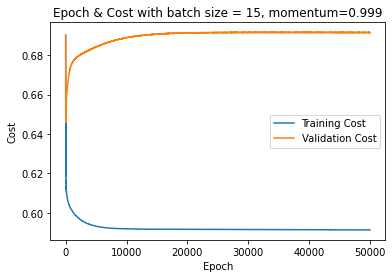

min cost at epoch 55 min_cost =  0.6457873254001772


In [153]:
momentum_result(50000,15,0.999)

terminated after 50000 iterations, with norm of the gradient equal to 0.03913295230803897
the weight found: [ 9.65979467 -1.48278085 -4.77108091 -0.43885974 -1.56151586 -1.77267909
  0.39488579 -2.36487684  3.42766039]


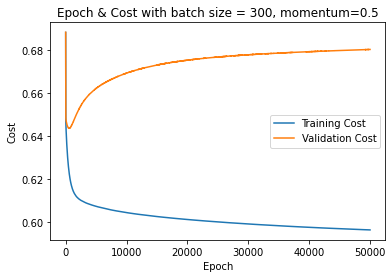

min cost at epoch 553 min_cost =  0.6436051936514289


In [154]:
momentum_result(50000,300,0.5)

terminated after 50000 iterations, with norm of the gradient equal to 0.0389213165766181
the weight found: [ 9.65972042 -1.48278522 -4.77109732 -0.43886872 -1.56151001 -1.77269248
  0.39487823 -2.36487566  3.42765044]


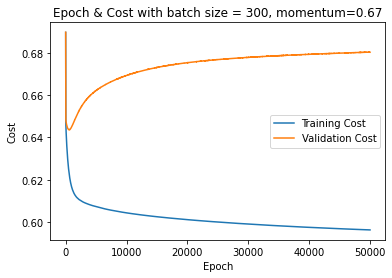

min cost at epoch 564 min_cost =  0.6436071615193052


In [155]:
momentum_result(50000,300,0.67)

terminated after 50000 iterations, with norm of the gradient equal to 0.038838901296415734
the weight found: [ 9.65967034 -1.48281477 -4.77111552 -0.43886776 -1.56148825 -1.77271028
  0.39487225 -2.36488677  3.42762314]


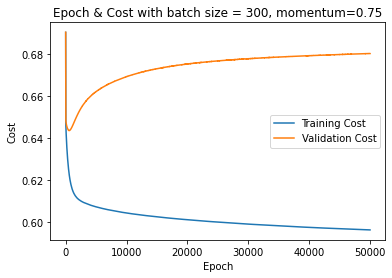

min cost at epoch 564 min_cost =  0.6436083431219327


In [156]:
momentum_result(50000,300,0.75)

terminated after 50000 iterations, with norm of the gradient equal to 0.038792474665700974
the weight found: [ 9.65962741 -1.48284204 -4.77112818 -0.43886364 -1.56146808 -1.77272614
  0.39486659 -2.36489697  3.42760289]


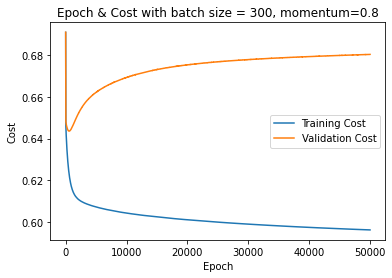

min cost at epoch 564 min_cost =  0.643609504578174


In [157]:
momentum_result(50000,300,0.8)

terminated after 50000 iterations, with norm of the gradient equal to 0.038665410994836565
the weight found: [ 9.65945181 -1.48298528 -4.77119029 -0.43885019 -1.56144292 -1.77279447
  0.39484045 -2.36493693  3.42748905]


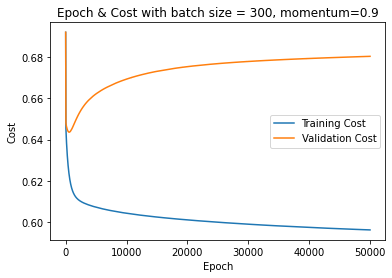

min cost at epoch 571 min_cost =  0.6436130576449293


In [158]:
momentum_result(50000,300,0.9)

terminated after 50000 iterations, with norm of the gradient equal to 0.038349731354570066
the weight found: [ 9.65679369 -1.48379939 -4.77151315 -0.43877923 -1.56185581 -1.77343372
  0.39439914 -2.36498428  3.42742345]


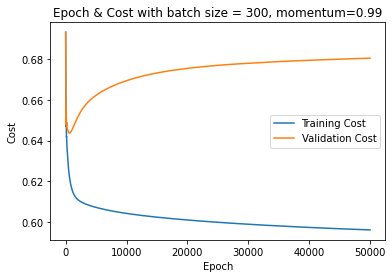

min cost at epoch 622 min_cost =  0.643679312246008


In [15]:
momentum_result(50000,300,0.99)

terminated after 50000 iterations, with norm of the gradient equal to 0.03834822567273416
the weight found: [ 9.63002515 -1.48747805 -4.77251487 -0.43770604 -1.56465404 -1.77906437
  0.39002943 -2.36423146  3.43264982]


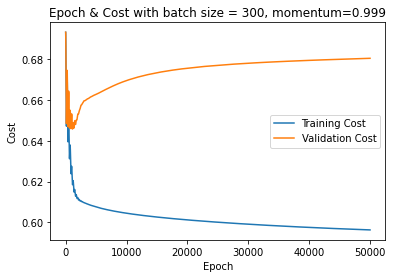

min cost at epoch 1122 min_cost =  0.6457258283816306


In [160]:
momentum_result(50000,300,0.999)

## Part2

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from string import punctuation
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.neural_network import MLPClassifier

In [2]:
def remove_punctuations(sentence):
    for p in punctuation:
        sentence = sentence.replace(p,'')
    return sentence

In [3]:
def remove_digits(sentence):
    sentence = ''.join([i for i in sentence if not i.isdigit()])
    return sentence

In [4]:
def Stemmer(text):
    documents = []
    porter = PorterStemmer()
    for s in text:
        s = str(s).lower()
        words_token = word_tokenize(s)
        words = [porter.stem(w) for w in words_token]
        documents.append(' '.join(words))
    return documents

In [5]:
def lemmatizer(text):
    documents = []
    word_lemmatizer = WordNetLemmatizer()
    for s in text:
        s = str(s).lower()
        words_token = word_tokenize(s)
        words = [word_lemmatizer.lemmatize(w) for w in words_token]
        documents.append(' '.join(words))
    return documents
    

In [6]:
def stopwords(text):
    stop = stopwords.words('english')
    return ' '.join(word for word in text if word not in stop)

In [7]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression(solver='sag'))])

In [8]:
text_clf_cv_ngram = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegressionCV(solver='sag',max_iter=1000))])

In [9]:
text_clf_cv_default = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegressionCV(solver='sag',max_iter=1000))])

In [25]:
text_clf_MLP = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MLPClassifier(solver='adam',verbose=False, random_state=551))])

In [12]:
train_df = pd.read_csv("fake_news_train.csv")
train_x = train_df["text"]
train_y = train_df["label"]
val_df = pd.read_csv("fake_news_val.csv")
val_x = val_df["text"]
val_y = val_df["label"]
test_df = pd.read_csv("fake_news_test.csv")
test_x = test_df["text"]
test_y = test_df["label"]


In [50]:
# accuracy with no data preprocessing 
text_clf_cv_default.fit(train_x, train_y)
val_pred = text_clf_cv_default.predict(val_x)
print("accuracy on val data:", accuracy_score(val_pred, val_y))

accuracy on val data: 0.7505


In [52]:
# remove punctuations
train_x_no_punc=train_df["text"].apply(remove_punctuations)
text_clf_cv_default.fit(train_x_no_punc, train_y)
val_pred = text_clf_cv_default.predict(val_x)
print("accuracy on val data:", accuracy_score(val_pred, val_y))

accuracy on val data: 0.752


In [53]:
#remove digits
train_x_no_digits=train_df["text"].apply(remove_digits)
text_clf_cv_default.fit(train_x_no_digits, train_y)
val_pred = text_clf_cv_default.predict(val_x)
print("accuracy on val data:", accuracy_score(val_pred, val_y))

accuracy on val data: 0.742


In [54]:
#Stemming
train_x_stemmer=Stemmer(train_x)
text_clf_cv_default.fit(train_x_stemmer, train_y)
val_pred = text_clf_cv_default.predict(val_x)
print("accuracy on val data:", accuracy_score(val_pred, val_y))

accuracy on val data: 0.6525


In [55]:
#Lemmatization
train_x_lemmatizer=lemmatizer(train_x)
text_clf_cv_default.fit(train_x_lemmatizer, train_y)
val_pred = text_clf_cv_default.predict(val_x)
print("accuracy on val data:", accuracy_score(val_pred, val_y))

accuracy on val data: 0.7315


In [14]:
# ngram=(1,2)
text_clf_cv_ngram.fit(train_x, train_y)
val_pred = text_clf_cv_ngram.predict(val_x)
print("accuracy on val data:", accuracy_score(val_pred, val_y))

accuracy on val data: 0.787


In [68]:
# ngram=(1,2) and remove punctuations
train_x_no_punc=train_df["text"].apply(remove_punctuations)
text_clf_cv_ngram.fit(train_x_no_punc, train_y)
val_pred = text_clf_cv_ngram.predict(val_x)
print("accuracy on val data:", accuracy_score(val_pred, val_y))

accuracy on val data: 0.7705


In [26]:
# MLP
text_clf_MLP.fit(train_x, train_y)
val_pred = text_clf_MLP.predict(val_x)
print("accuracy on val data:", accuracy_score(val_pred, val_y))

accuracy on val data: 0.7555


In [16]:
# test
text_clf_cv_ngram.fit(train_x, train_y)
test_pred=text_clf_cv_ngram.predict(test_x)
print("accuracy on test data:", accuracy_score(test_pred, test_y))

accuracy on test data: 0.7773333333333333
